## Логистическая регрессия

Ваша задача в sklearn, используя один из алгоритмов, рассмотренных на паре, построить и обучить классификатор, посчитать метрики качества, построить ROC кривую и посчитайте величину ROC AUC. - 4 балла

In [23]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [24]:
train_path = 'aclImdb/train'

reviews_train = load_files(train_path)
text_train, y_train = reviews_train.data, reviews_train.target

In [25]:
test_path = 'aclImdb/test'

reviews_test = load_files(test_path)
text_test, y_test = reviews_test.data, reviews_test.target

In [26]:
cv = CountVectorizer()
cv.fit(text_train)

CountVectorizer()

In [27]:
print(len(cv.vocabulary_))

74849


In [28]:
X_train = cv.transform(text_train)
X_test = cv.transform(text_test)

In [29]:
logit = LogisticRegression(n_jobs=-5, random_state=10)
logit.fit(X_train, y_train)

c:\users\anastasia\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-5, random_state=10)

In [30]:
print(round(logit.score(X_train, y_train),3), round(logit.score(X_test, y_test),3))

0.981 0.864


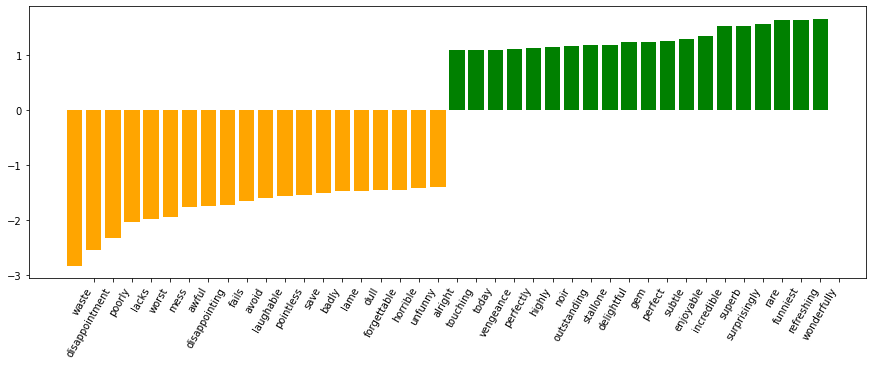

In [46]:
#просто захотелось попробовать красивый график из статьи

def show_words(classifier, feature_names, n_top_features = 20):
    coef = classifier.coef_.ravel()
    pos_coeffs = np.argsort(coef)[-n_top_features:]
    neg_coeffs = np.argsort(coef)[: n_top_features]
    interest_coeffs = np.hstack([neg_coeffs, pos_coeffs])
    plt.figure(figsize=(15,5))
    colors = ['orange' if c <0 else 'green' for c in coef[interest_coeffs]]
    plt.bar(np.arange(2*n_top_features), coef[interest_coeffs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1+2*n_top_features), feature_names[interest_coeffs], rotation=60, ha='right')
    
show_words(logit, cv.get_feature_names())

## ROC кривая и ROC AUC

In [61]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [62]:
y_true = y_test
y_predicted = logit.predict(X_test)

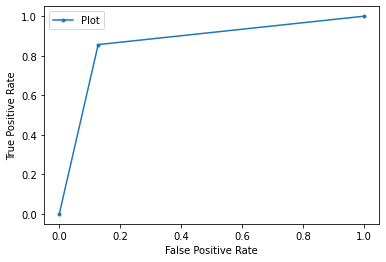

In [63]:
fpr, tpr, thrhld = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Plot')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [64]:
thrhld

array([2, 1, 0])

In [75]:
print(round(roc_auc_score(y_true, y_predicted), 3)

SyntaxError: unexpected EOF while parsing (<ipython-input-75-d2b7dbe8d793>, line 1)

## Предсказания вероятностей класса

Используя предсказания вероятностей класса, найдите 15 самых негативных и самых позитивных рецензий по мнению модели. - 3 балла

## Свои функции

Написать свои функции, которые бы считали tp, fp, tn, fn, и возвращали точность, полноту и ф-меру и применить их к результатам, полученным вашими классификаторами (если все сделано правильно, то результаты должны совпадать с полученными sklearn метриками). - 3 балла

In [68]:
def metrics(y_true, y_predicted):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(y_true)): 
        if y_true[i] == y_predicted[i] == 1:
            tp += 1
        if y_true[i] == 1 and y_true[i] != y_predicted[i]:
            fp += 1
        if y_true[i] == y_predicted[i] == 0:
            tn += 1
        if y_true[i] == 0 and y_true[i] != y_predicted[i]:
            fn += 1
    
    pr = tp/(fp+tp)
    r = tp/(tp+fn)
    f2 = 2*pr*r/(pr+r)

    return(pr, r, f2)

In [70]:
pr1, r1, f21 = metrics(y_train, logit.predict(X_train))

In [71]:
pr2, r2, f22 = metrics(y_test, logit.predict(X_test))

In [72]:
print(round(f21, 3), round(f22, 3))

0.981 0.863


In [73]:
print(round(logit.score(X_train, y_train),3), round(logit.score(X_test, y_test),3))

0.981 0.864


## Kinda библиография

(на случай вопросов, откуда я что-нибудь взяла)
1. https://vc.ru/ml/114527-klassifikaciya-otzyvov-polzovateley-socsetey-s-pomoshchyu-mashinnogo-obucheniya
2. https://coderoad.ru/39733934/Python-%D0%B3%D1%80%D0%B0%D1%84-TP-FP-FN-TN